In [2]:
from lightkurve import search_targetpixelfile
# First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
tpf = search_targetpixelfile('KIC 6922244', quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

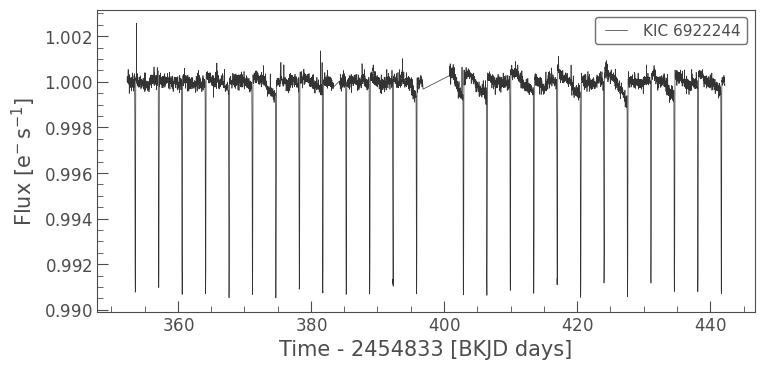

In [3]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

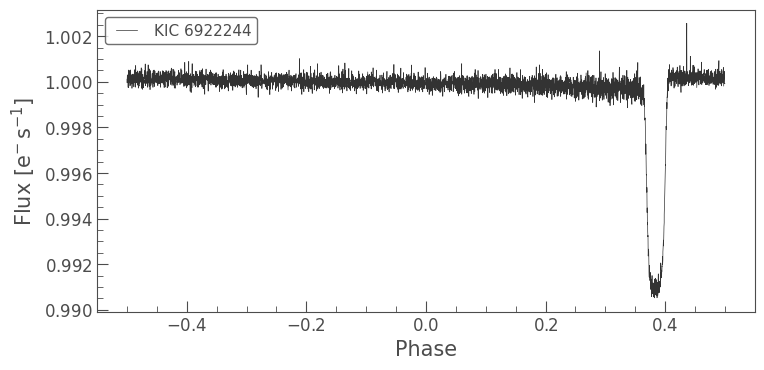

In [4]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

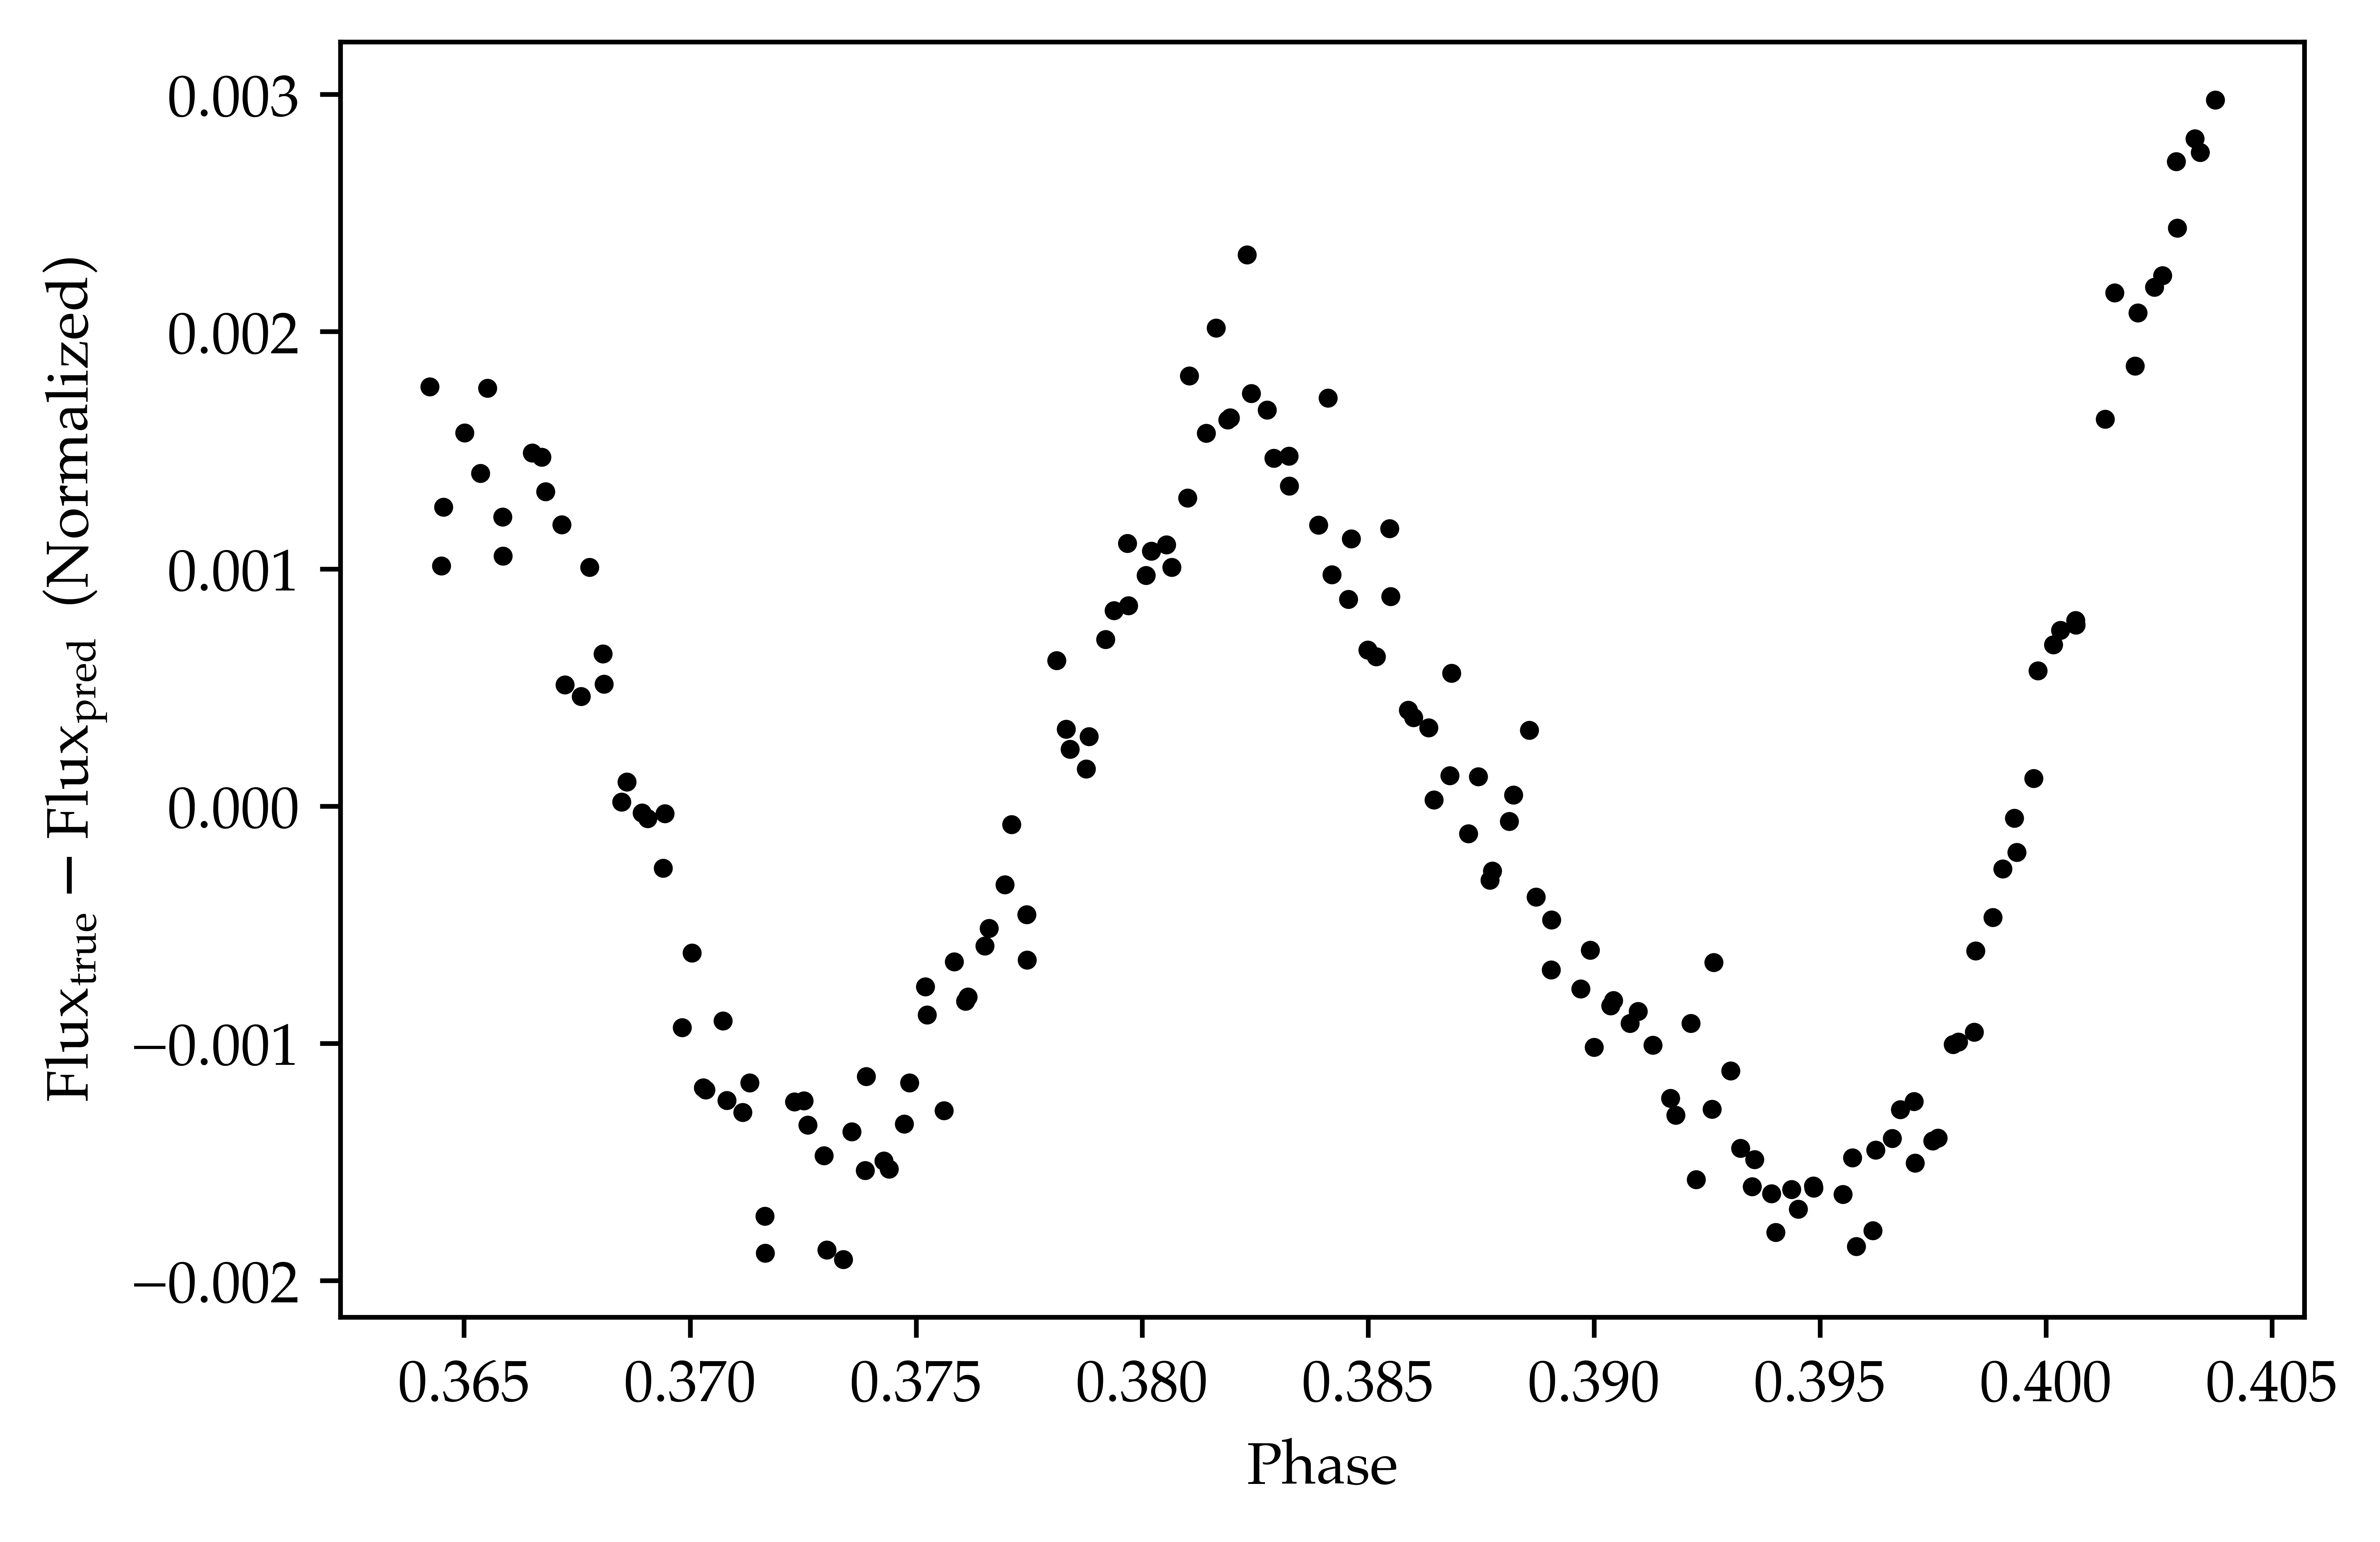

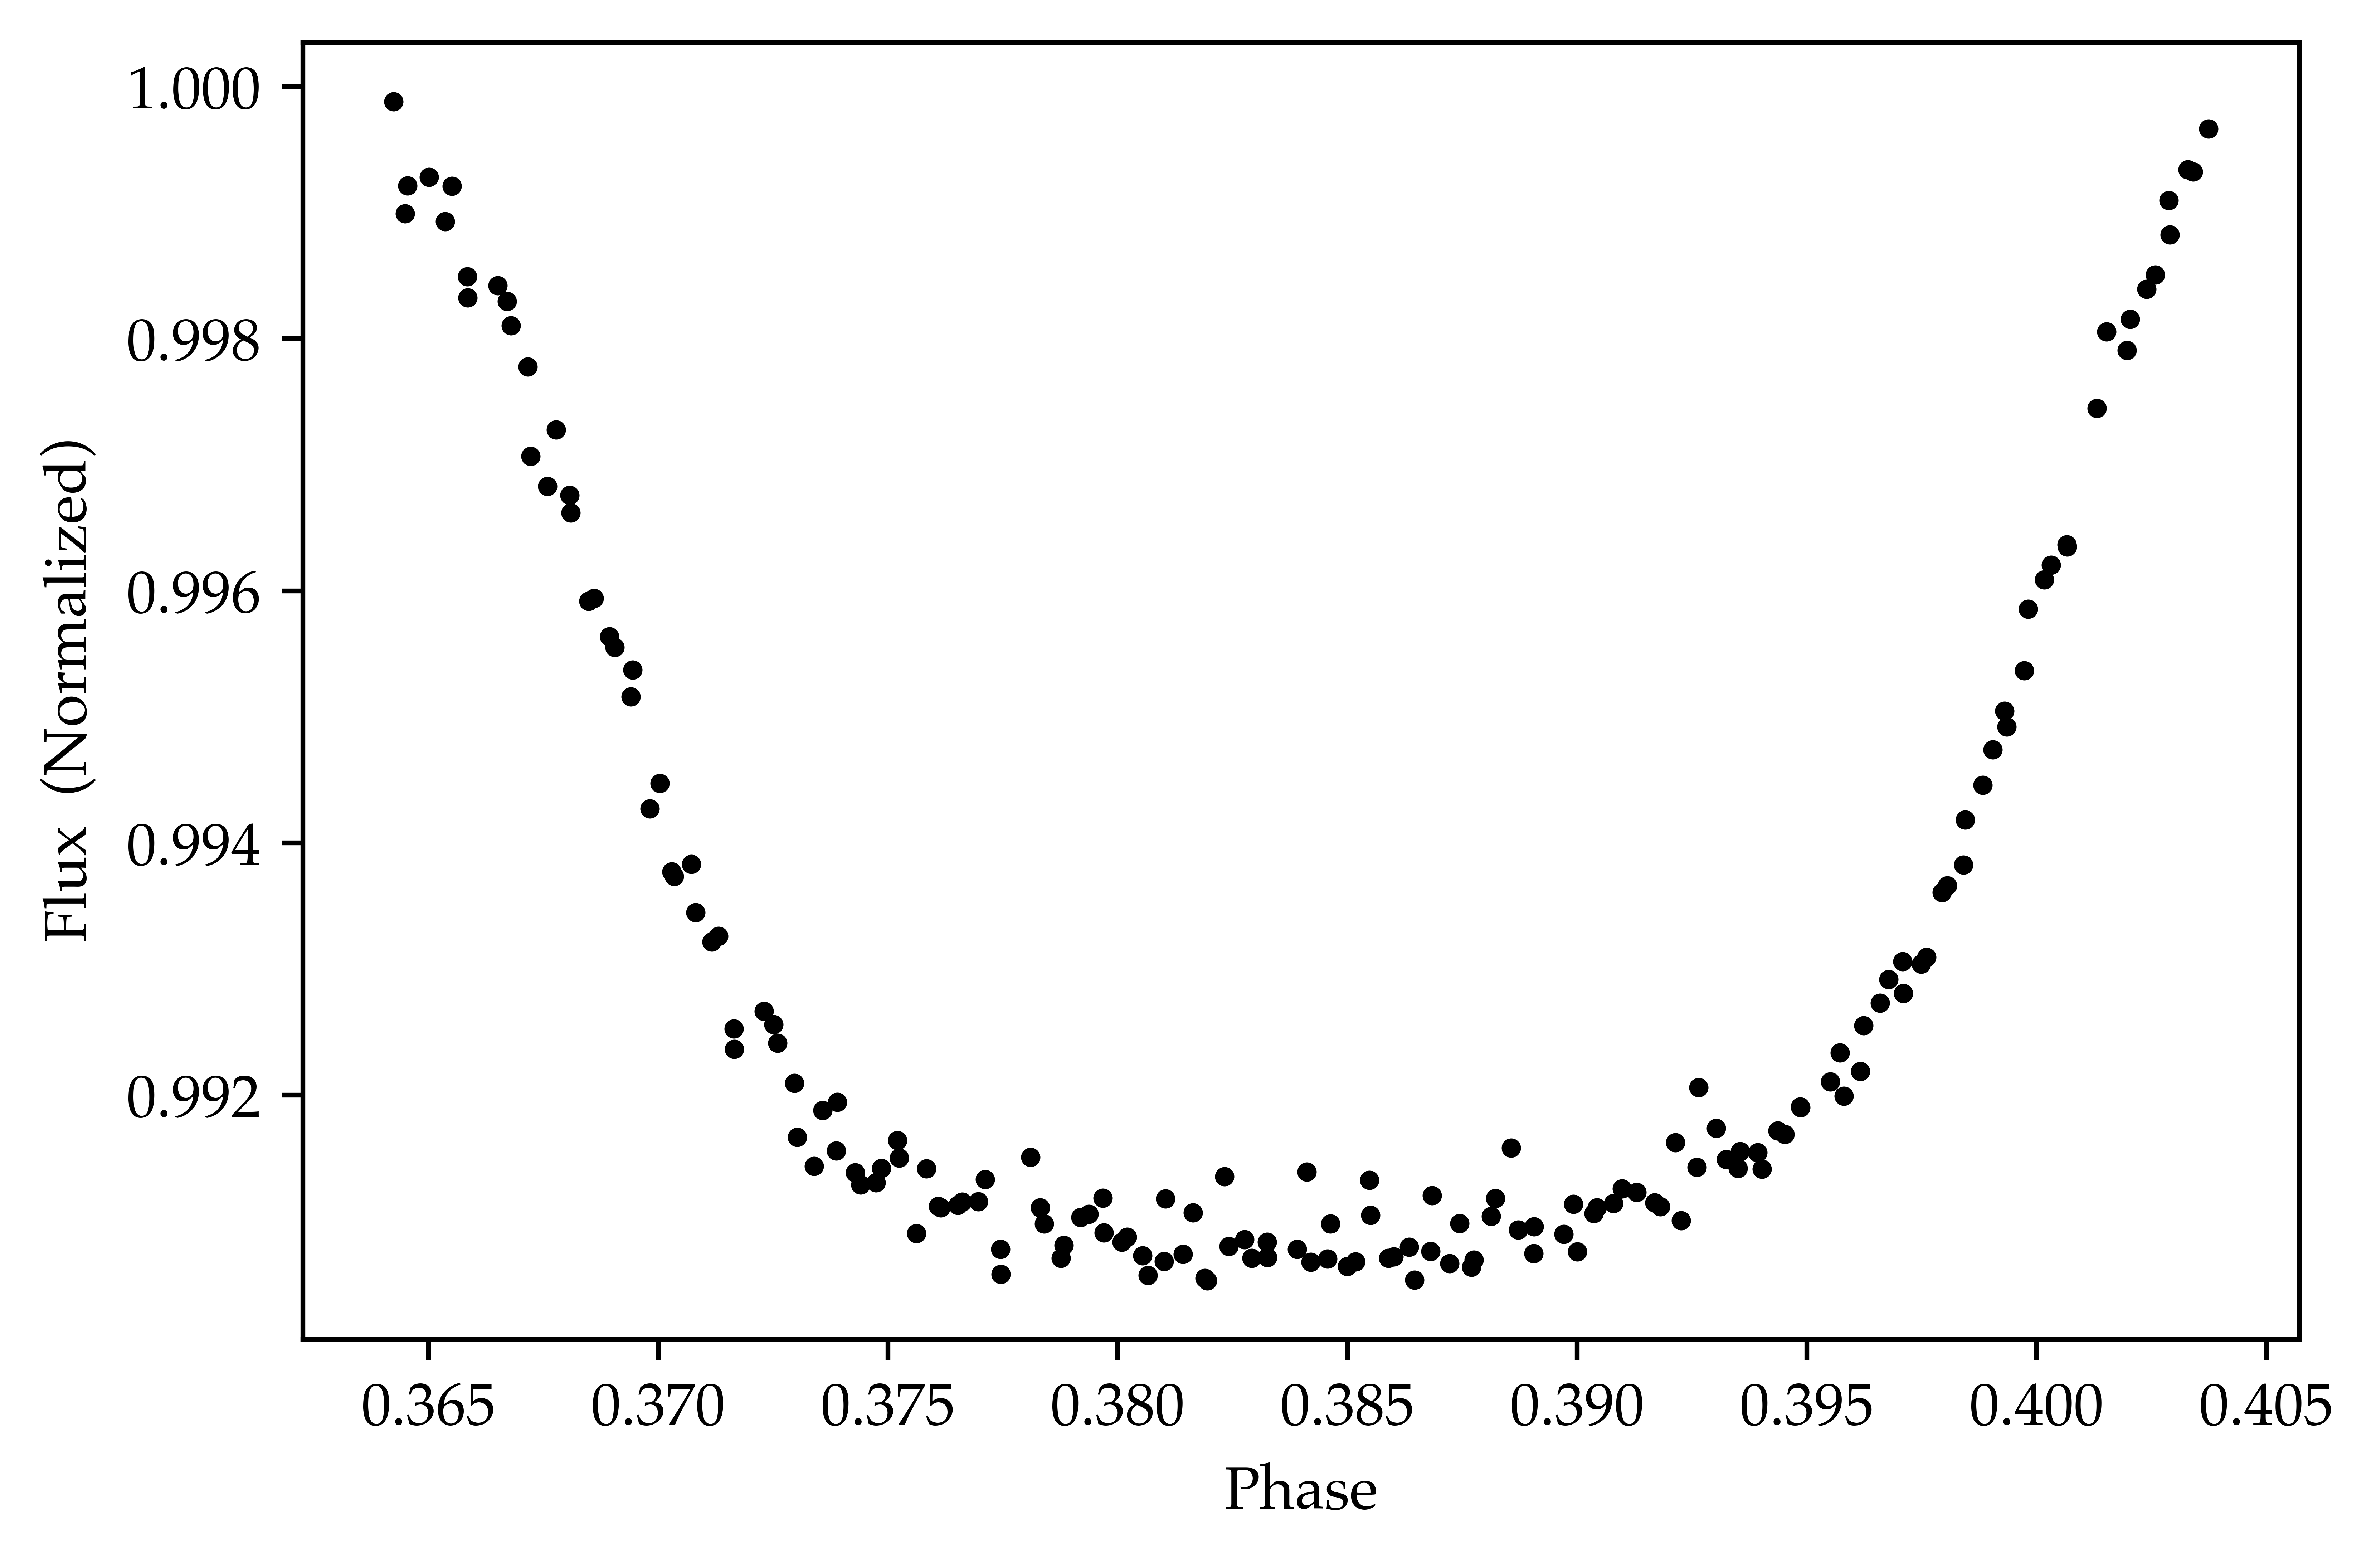

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
coordinates = list(zip(folded_lc.time, folded_lc.flux))
q1_flux = np.percentile(folded_lc.flux, 10)
absolute_minimum = min(coordinates, key = lambda t: t[1])
absolute_minimum_index, leftmost_index, rightmost_index = (coordinates.index(absolute_minimum),)*3
while coordinates[leftmost_index][1] <= q1_flux:
    leftmost_index -= 1
    rightmost_index +=1.2 # assume symmetry to get idealized geometry
isolated_curve = [coordinate for index, coordinate in enumerate(coordinates) if leftmost_index <=
                  index <= rightmost_index]
left_points = [coordinate for coordinate in isolated_curve 
               if coordinate[0] <= absolute_minimum[0]]
right_points = [coordinate for coordinate in isolated_curve 
                if coordinate[0] >= absolute_minimum[0]]
x_left, y_left = zip(*left_points)
x_right, y_right = zip(*right_points)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_left, y_left)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x_right, y_right)
left_residuals, right_residuals = [], []
for time, flux in left_points:
    flux_hat =  slope * time + intercept
    residual = (time, flux - flux_hat)
    left_residuals.append(residual)
for time, flux in right_points:
    flux_hat = slope2 * time + intercept2
    residual = (time, flux - flux_hat)
    right_residuals.append(residual)

In [ ]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
plt.figure(dpi = 1200)
plt.xlabel("Phase")
plt.ylabel("$\mathregular{Flux_{true}} - \mathregular{Flux_{pred}} \enspace \mathregular{(Normalized)}$")
plt.scatter(*zip(*left_residuals), color = "black", s = 5)
plt.scatter(*zip(*right_residuals), color = "black", s = 5)
#plt.scatter(*zip(*right_residuals))
plt.figure(dpi=1200)
plt.xlabel("Phase")
plt.ylabel("$\mathregular{Flux} \enspace \mathregular{(Normalized)}$")
plt.scatter(*zip(*isolated_curve), color = "black", s = 5)

In [101]:
for index, residual in enumerate(left_residuals):
    if index > 0:
        if left_residuals[index][1] > 0 and left_residuals[index - 1][1] < 0 or left_residuals[index][1] < 0 and left_residuals[index - 1][1] > 0:
            print(F"The sign changes at index {index}.")

The sign changes at index 19.
The sign changes at index 58.


In [102]:
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('KIC 10264202', quarter=10).download().PDCSAP_FLUX.remove_nans()

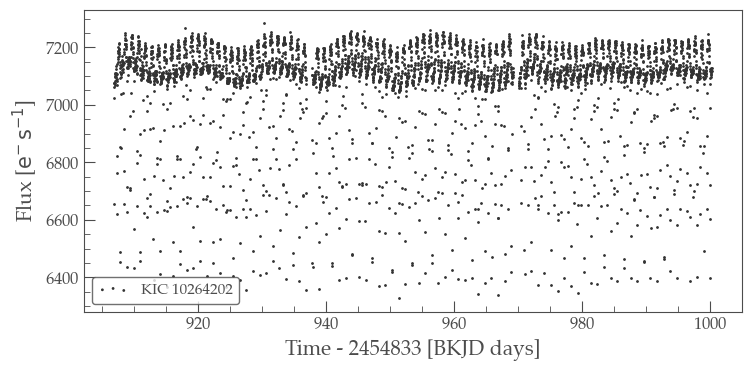

In [103]:
lc.scatter();

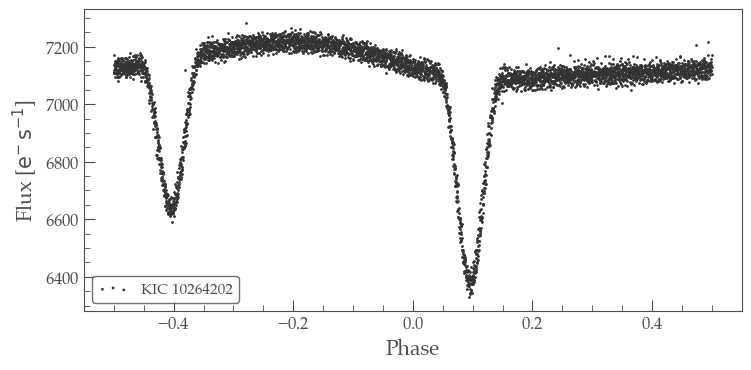

In [114]:
folded_lc = lc.fold(1.0350972)
folded_lc.scatter();

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
coordinates = list(zip(folded_lc.time, folded_lc.flux))
q1_flux = np.percentile(folded_lc.flux, 10)
absolute_minimum = min(coordinates, key = lambda t: t[1])
absolute_minimum_index, leftmost_index, rightmost_index = (coordinates.index(absolute_minimum),)*3
while coordinates[leftmost_index][1] <= q1_flux:
    leftmost_index -= 2
    rightmost_index +=2.2 # assume symmetry to get idealized geometry
isolated_curve = [coordinate for index, coordinate in enumerate(coordinates) if leftmost_index <=
                  index <= rightmost_index]
left_points = [coordinate for coordinate in isolated_curve 
               if coordinate[0] <= absolute_minimum[0]]
right_points = [coordinate for coordinate in isolated_curve 
                if coordinate[0] >= absolute_minimum[0]]
x_left, y_left = zip(*left_points)
x_right, y_right = zip(*right_points)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_left, y_left)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x_right, y_right)
left_residuals, right_residuals = [], []
for time, flux in left_points:
    flux_hat =  slope * time + intercept
    residual = (time, flux - flux_hat)
    left_residuals.append(residual)
for time, flux in right_points:
    flux_hat = slope2 * time + intercept2
    residual = (time, flux - flux_hat)
    right_residuals.append(residual)

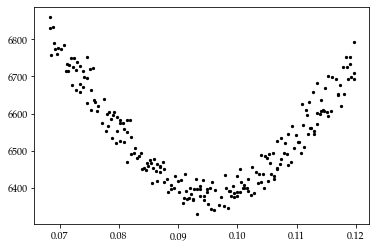

In [121]:
plt.scatter(*zip(*isolated_curve), color = "black", s = 5)

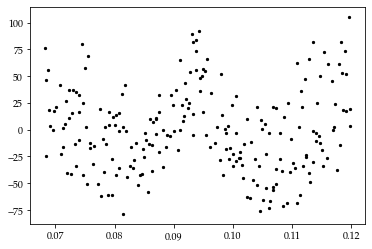

In [122]:
plt.scatter(*zip(*left_residuals), color = "black", s = 5)
plt.scatter(*zip(*right_residuals), color = "black", s = 5)

In [123]:
for index, residual in enumerate(left_residuals):
    if index > 0:
        if left_residuals[index][1] > 0 and left_residuals[index - 1][1] < 0 or left_residuals[index][1] < 0 and left_residuals[index - 1][1] > 0:
            print(F"The sign changes at index {index}.")

The sign changes at index 2.
The sign changes at index 3.
The sign changes at index 6.
The sign changes at index 7.
The sign changes at index 10.
The sign changes at index 11.
The sign changes at index 12.
The sign changes at index 13.
The sign changes at index 15.
The sign changes at index 16.
The sign changes at index 18.
The sign changes at index 19.
The sign changes at index 21.
The sign changes at index 23.
The sign changes at index 24.
The sign changes at index 25.
The sign changes at index 29.
The sign changes at index 30.
The sign changes at index 32.
The sign changes at index 33.
The sign changes at index 34.
The sign changes at index 39.
The sign changes at index 40.
The sign changes at index 43.
The sign changes at index 44.
The sign changes at index 46.
The sign changes at index 48.
The sign changes at index 50.
The sign changes at index 52.
The sign changes at index 53.
The sign changes at index 55.
The sign changes at index 57.
The sign changes at index 59.
The sign chang

In [124]:
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('Kepler-2', quarter=10).download().PDCSAP_FLUX.remove_nans()

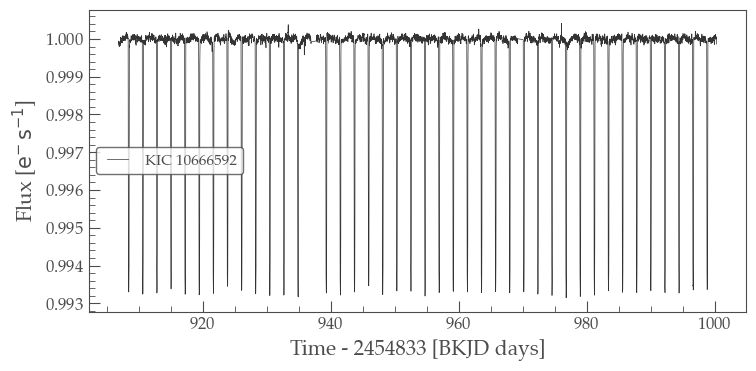

In [126]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

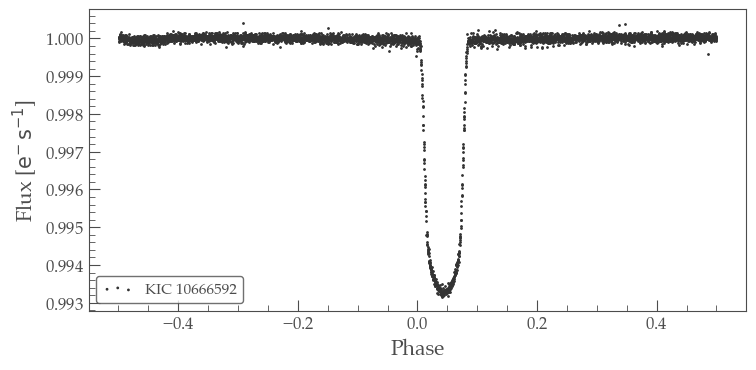

In [129]:
folded_lc = flat_lc.fold(2.20474)
folded_lc.scatter();

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
coordinates = list(zip(folded_lc.time, folded_lc.flux))
q1_flux = np.percentile(folded_lc.flux, 10)
absolute_minimum = min(coordinates, key = lambda t: t[1])
absolute_minimum_index, leftmost_index, rightmost_index = (coordinates.index(absolute_minimum),)*3
while coordinates[leftmost_index][1] <= q1_flux:
    leftmost_index -= 2
    rightmost_index +=2.2 # assume symmetry to get idealized geometry
isolated_curve = [coordinate for index, coordinate in enumerate(coordinates) if leftmost_index <=
                  index <= rightmost_index]
left_points = [coordinate for coordinate in isolated_curve 
               if coordinate[0] <= absolute_minimum[0]]
right_points = [coordinate for coordinate in isolated_curve 
                if coordinate[0] >= absolute_minimum[0]]
x_left, y_left = zip(*left_points)
x_right, y_right = zip(*right_points)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_left, y_left)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x_right, y_right)
left_residuals, right_residuals = [], []
for time, flux in left_points:
    flux_hat =  slope * time + intercept
    residual = (time, flux - flux_hat)
    left_residuals.append(residual)
for time, flux in right_points:
    flux_hat = slope2 * time + intercept2
    residual = (time, flux - flux_hat)
    right_residuals.append(residual)

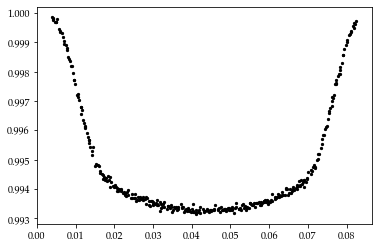

In [131]:
plt.scatter(*zip(*isolated_curve), color = "black", s = 5)

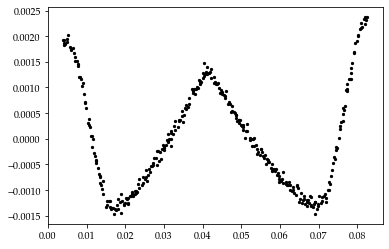

In [132]:
plt.scatter(*zip(*left_residuals), color = "black", s = 5)
plt.scatter(*zip(*right_residuals), color = "black", s = 5)

In [134]:
for index, residual in enumerate(left_residuals):
    if index > 0:
        if left_residuals[index][1] > 0 and left_residuals[index - 1][1] < 0 or left_residuals[index][1] < 0 and left_residuals[index - 1][1] > 0:
            print(F"The sign changes at index {index}.")
print(len(left_residuals))

The sign changes at index 33.
The sign changes at index 119.
The sign changes at index 120.
The sign changes at index 123.
The sign changes at index 124.
The sign changes at index 125.
The sign changes at index 126.
The sign changes at index 127.
165
